# Reinforcement Learning Example – Q-Learning (GridWorld)

This notebook demonstrates a simple Reinforcement Learning example using **Q-Learning** with a visible GridWorld.

## Problem Description
- 3x3 Grid
- Agent starts at (0,0)
- Goal at (2,2)
- Reward: +10 for goal, -1 per step

In [1]:

import numpy as np
import random
import matplotlib.pyplot as plt


## GridWorld Visualization

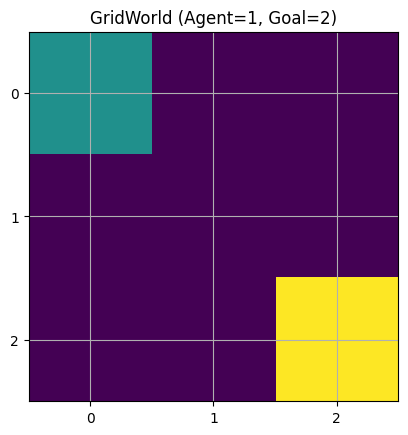

In [2]:

def draw_grid(agent_pos=None):
    grid = np.zeros((3,3))
    grid[2,2] = 2  # Goal
    if agent_pos:
        grid[agent_pos] = 1  # Agent

    plt.imshow(grid)
    plt.xticks(range(3))
    plt.yticks(range(3))
    plt.grid(True)
    plt.title("GridWorld (Agent=1, Goal=2)")
    plt.show()

draw_grid((0,0))


## Initialize Environment

In [3]:

GRID_SIZE = 3
actions = ["up", "down", "left", "right"]

Q = {}
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        Q[(i, j)] = {a: 0 for a in actions}

alpha = 0.1
gamma = 0.9
epsilon = 0.2
goal = (2, 2)


## Environment Dynamics

In [4]:

def take_action(state, action):
    i, j = state
    if action == "up": i = max(i-1, 0)
    if action == "down": i = min(i+1, GRID_SIZE-1)
    if action == "left": j = max(j-1, 0)
    if action == "right": j = min(j+1, GRID_SIZE-1)
    reward = 10 if (i, j) == goal else -1
    return (i, j), reward


## Training with Q-Learning

In [5]:

for episode in range(500):
    state = (0, 0)
    while state != goal:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)
        else:
            action = max(Q[state], key=Q[state].get)

        next_state, reward = take_action(state, action)
        Q[state][action] += alpha * (
            reward + gamma * max(Q[next_state].values()) - Q[state][action]
        )
        state = next_state


## Learned Policy

In [6]:

for state in sorted(Q.keys()):
    print(state, "->", max(Q[state], key=Q[state].get))


(0, 0) -> right
(0, 1) -> down
(0, 2) -> down
(1, 0) -> right
(1, 1) -> down
(1, 2) -> down
(2, 0) -> right
(2, 1) -> right
(2, 2) -> up


## Agent Path Visualization

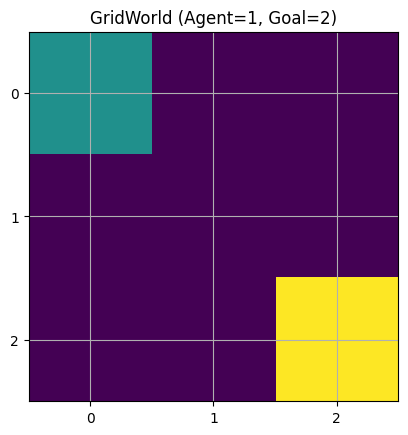

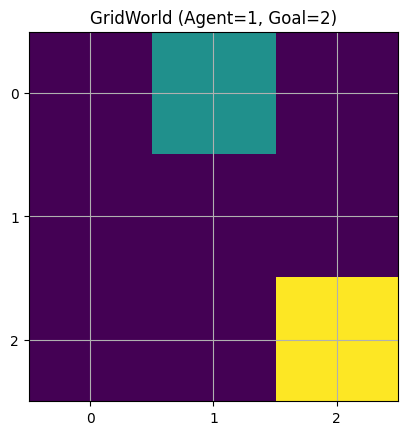

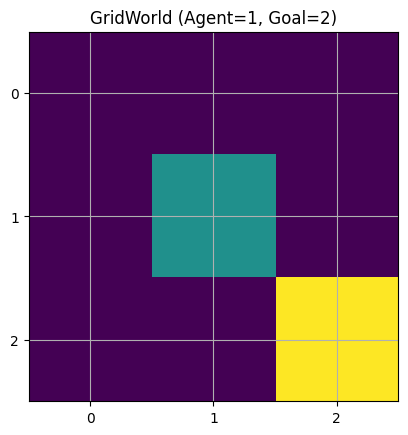

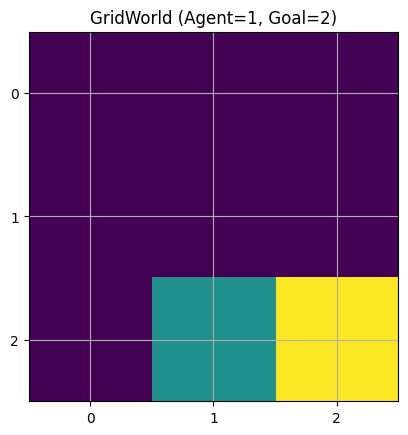

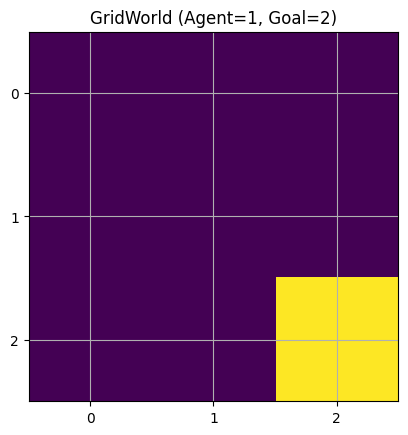

In [7]:

state = (0,0)
path = [state]

while state != goal:
    action = max(Q[state], key=Q[state].get)
    state, _ = take_action(state, action)
    path.append(state)

for step in path:
    draw_grid(step)


## Conclusion
This visualization helps understand how the agent moves through the grid to reach the goal.